In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

✅ Jeu de données chargé avec succès

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no  

--- INFORMATIONS GÉNÉRALES ---


/tmp/ipython-input-3368354991.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=df, palette="pastel")


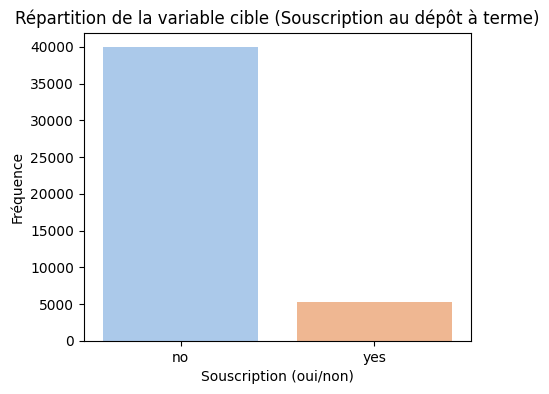

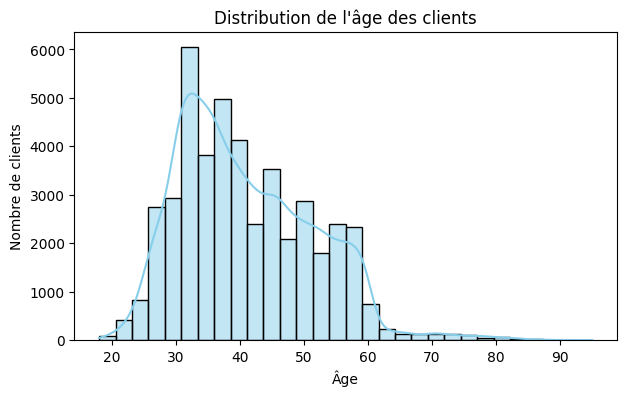

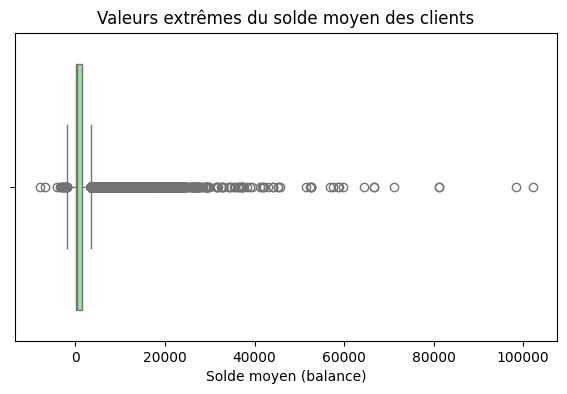

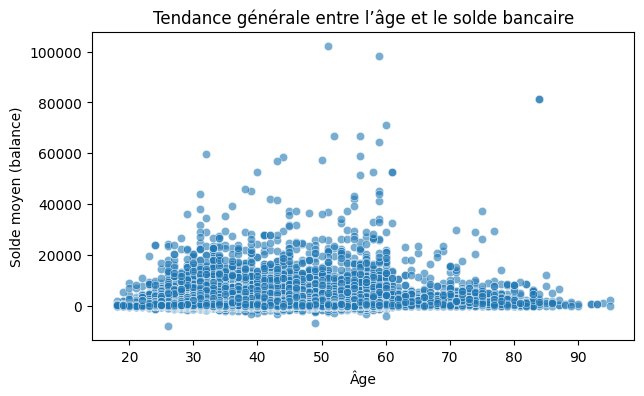

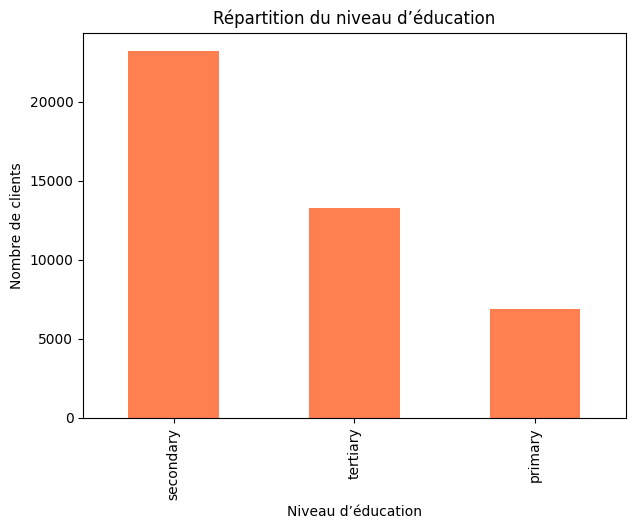

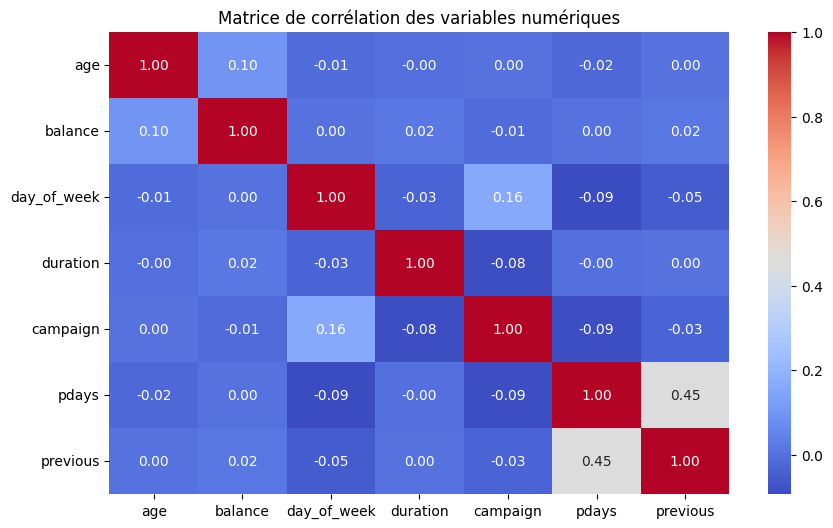


--- INTERPRÉTATION DES CORRÉLATIONS ---

📊 Interprétation :
- Une corrélation proche de +1 indique une relation positive (les deux variables augmentent ensemble).
- Une corrélation proche de -1 indique une relation inverse.
- Une corrélation proche de 0 indique peu ou pas de relation.


🧠 CONCLUSION GÉNÉRALE :

1️⃣ Âge : la majorité des clients ont entre 30 et 50 ans.
2️⃣ Solde bancaire (balance) : très variable, avec quelques valeurs extrêmes positives.
3️⃣ Niveau d’éducation : le plus fréquent est 'secondary'.
4️⃣ Souscription : faible proportion de clients ayant souscrit un dépôt à terme.
5️⃣ Corrélation : la variable 'age' est faiblement liée à 'balance', 
   ce qui suggère que le solde moyen n’augmente pas forcément avec l’âge.


✅ Fin du rapport d’analyse exploratoire.


In [4]:
# ===============================
# 📊 RAPPORT D’ANALYSE : BANK MARKETING (UCI)
# Réalisé par : Douae El Fagrouch
# ===============================

# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# ===============================
# 1️⃣ Chargement du jeu de données
# ===============================
bank_marketing = fetch_ucirepo(id=222)

# Extraction des données
X = bank_marketing.data.features
y = bank_marketing.data.targets

# Fusionner les variables explicatives et la cible
df = pd.concat([X, y], axis=1)

print("✅ Jeu de données chargé avec succès\n")
print(df.head())

# ===============================
# 2️⃣ Informations générales
# ===============================
print("\n--- INFORMATIONS GÉNÉRALES ---")
print(df.info())
print(f"\nNombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# ===============================
# 3️⃣ Analyse descriptive des variables numériques
# ===============================
numeric_df = df.select_dtypes(include=[np.number])
print("\n--- STATISTIQUES DESCRIPTIVES ---")
print(numeric_df.describe())

# Moyenne, médiane, écart-type, variance
print("\n--- MOYENNE / MÉDIANE / ÉCART-TYPE / VARIANCE ---")
for col in numeric_df.columns:
    print(f"\n📈 {col} :")
    print(f"  Moyenne : {numeric_df[col].mean():.2f}")
    print(f"  Médiane : {numeric_df[col].median():.2f}")
    print(f"  Variance : {numeric_df[col].var():.2f}")
    print(f"  Écart-type : {numeric_df[col].std():.2f}")
    print(f"  Minimum : {numeric_df[col].min():.2f}")
    print(f"  Maximum : {numeric_df[col].max():.2f}")

# ===============================
# 4️⃣ Analyse de la variable cible
# ===============================
target = "y"
print("\n--- RÉPARTITION DE LA VARIABLE CIBLE ---")
print(df[target].value_counts(normalize=True) * 100)

plt.figure(figsize=(5,4))
sns.countplot(x=target, data=df, palette="pastel")
plt.title("Répartition de la variable cible (Souscription au dépôt à terme)")
plt.xlabel("Souscription (oui/non)")
plt.ylabel("Fréquence")
plt.show()

# ===============================
# 5️⃣ Visualisations et tendances
# ===============================

# Histogramme de l’âge
plt.figure(figsize=(7,4))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title("Distribution de l'âge des clients")
plt.xlabel("Âge")
plt.ylabel("Nombre de clients")
plt.show()

# Boxplot pour détecter les valeurs extrêmes
plt.figure(figsize=(7,4))
sns.boxplot(x=df['balance'], color='lightgreen')
plt.title("Valeurs extrêmes du solde moyen des clients")
plt.xlabel("Solde moyen (balance)")
plt.show()

# Courbe d’évolution : âge vs balance (tendance générale)
plt.figure(figsize=(7,4))
sns.scatterplot(x='age', y='balance', data=df, alpha=0.6)
plt.title("Tendance générale entre l’âge et le solde bancaire")
plt.xlabel("Âge")
plt.ylabel("Solde moyen (balance)")
plt.show()

# Répartition selon le niveau d’éducation
plt.figure(figsize=(7,5))
df['education'].value_counts().plot(kind='bar', color='coral')
plt.title("Répartition du niveau d’éducation")
plt.xlabel("Niveau d’éducation")
plt.ylabel("Nombre de clients")
plt.show()

# ===============================
# 6️⃣ Corrélations entre variables
# ===============================
plt.figure(figsize=(10,6))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des variables numériques")
plt.show()

print("\n--- INTERPRÉTATION DES CORRÉLATIONS ---")
print("""
📊 Interprétation :
- Une corrélation proche de +1 indique une relation positive (les deux variables augmentent ensemble).
- Une corrélation proche de -1 indique une relation inverse.
- Une corrélation proche de 0 indique peu ou pas de relation.
""")

# ===============================
# 7️⃣ Interprétation globale
# ===============================
print("""
🧠 CONCLUSION GÉNÉRALE :

1️⃣ Âge : la majorité des clients ont entre 30 et 50 ans.
2️⃣ Solde bancaire (balance) : très variable, avec quelques valeurs extrêmes positives.
3️⃣ Niveau d’éducation : le plus fréquent est 'secondary'.
4️⃣ Souscription : faible proportion de clients ayant souscrit un dépôt à terme.
5️⃣ Corrélation : la variable 'age' est faiblement liée à 'balance',
   ce qui suggère que le solde moyen n’augmente pas forcément avec l’âge.
""")

print("\n✅ Fin du rapport d’analyse exploratoire.")
